In [33]:

import pandas as pd
import networkx as nx
import random
import seaborn as sns
import numpy as np
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv('gym_members_exercise_tracking.csv')  # Ensure it includes the specified columns
data['BMI'].describe()

count    973.000000
mean      24.912127
std        6.660879
min       12.320000
25%       20.110000
50%       24.160000
75%       28.560000
max       49.840000
Name: BMI, dtype: float64

[frozenset({96, 678, 631, 808, 873, 554, 174, 718, 464, 854, 23, 88, 281, 120, 606}), frozenset({482, 67, 773, 199, 328, 235, 876, 843, 76, 813, 750, 275, 404, 958}), frozenset({736, 705, 323, 355, 259, 740, 585, 333, 433, 439, 346, 158, 30}), frozenset({66, 294, 424, 777, 305, 633, 538, 922})]


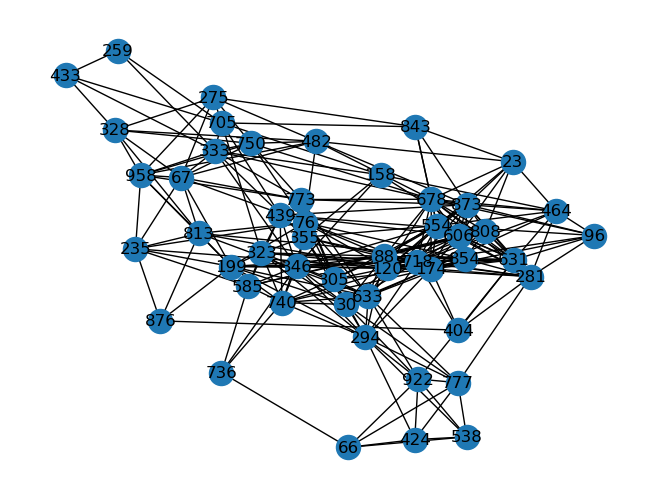

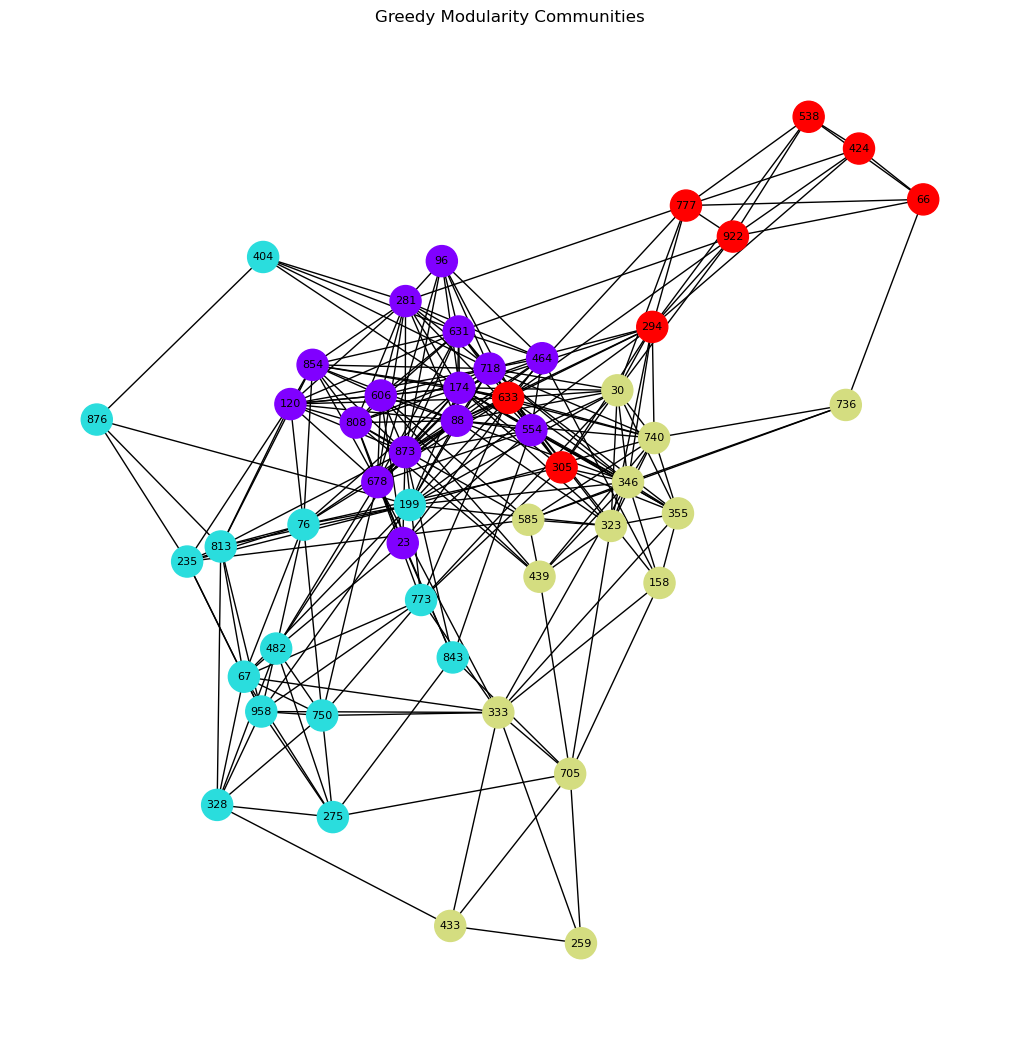

In [69]:
data = pd.read_csv('gym_members_exercise_tracking.csv')  # Ensure it includes the specified columns
data['member_ID'] = range(973)
data.head()

# Randomly select 50 members
subset = data.sample(50, random_state=42)

# Create the graph
G = nx.Graph()

# Add nodes
for idx, row in subset.iterrows():
    G.add_node(idx, **row.to_dict())

# Add edges based on similarity criteria
for node1, node2 in combinations(G.nodes, 2):
    member1 = G.nodes[node1]
    member2 = G.nodes[node2]

    # Define similarity criteria
    similarity_score = 0
    if member1['Workout_Type'] == member2['Workout_Type']:
        similarity_score += 1
    if abs(member1['Calories_Burned'] - member2['Calories_Burned']) <= 50:
        similarity_score += 1
    if abs(member1['Session_Duration (hours)'] - member2['Session_Duration (hours)']) <= 0.5:
        similarity_score += 1
    if abs(member1['Workout_Frequency (days/week)'] - member2['Workout_Frequency (days/week)']) <= 1:
        similarity_score += 1

    # Add edge if similarity score is above threshold
    if similarity_score > 2:
        G.add_edge(node1, node2, weight=similarity_score)

# Draw the graph
nx.draw(G, with_labels=True)

# Detect communities
c1 = nx.community.greedy_modularity_communities(G)
#c3 = nx.community.louvain_communities(G)
print(c1)
#print(c3)

# Function to assign community colors
def assign_community_colors(G, communities):
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i
    colors = [community_map[node] for node in G.nodes]
    return colors

# Plot graphs for each community detection algorithm
def plot_graph(G, communities, title):
    colors = assign_community_colors(G, communities)
    pos = nx.spring_layout(G, seed=42)  # Fixing layout for consistency
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=500, font_size=8)
    plt.title(title)
    plt.show()

# Plot each graph
plot_graph(G, c1, "Greedy Modularity Communities")
#plot_graph(G, c3, "Louvain Communities")

In [56]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient: {avg_clustering:.4f}")

# Average Path Length
# This only makes sense if the graph is connected, so ensure connectivity
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"\nAverage Path Length: {avg_path_length:.4f}")
else:
    print("\nGraph is not connected, so Average Path Length cannot be calculated.")

# Network Density
density = nx.density(G)
print(f"\nNetwork Density: {density:.4f}")

Number of nodes: 50
Number of edges: 270

Degree Centrality:
Node 199: 0.3061
Node 538: 0.1020
Node 174: 0.4898
Node 464: 0.2041
Node 66: 0.1020
Node 424: 0.1020
Node 718: 0.4490
Node 346: 0.3469
Node 281: 0.3061
Node 158: 0.1224
Node 876: 0.0816
Node 67: 0.2245
Node 235: 0.1633
Node 808: 0.2653
Node 482: 0.1837
Node 678: 0.3878
Node 76: 0.2449
Node 777: 0.1633
Node 854: 0.2653
Node 705: 0.1633
Node 88: 0.3878
Node 96: 0.1633
Node 813: 0.2041
Node 305: 0.2041
Node 275: 0.1429
Node 606: 0.2653
Node 355: 0.2041
Node 843: 0.1224
Node 740: 0.2653
Node 631: 0.3265
Node 23: 0.1633
Node 30: 0.3061
Node 750: 0.1837
Node 922: 0.1633
Node 404: 0.1020
Node 736: 0.0816
Node 958: 0.2041
Node 294: 0.2857
Node 773: 0.1837
Node 433: 0.0816
Node 259: 0.0612
Node 873: 0.3673
Node 328: 0.1429
Node 333: 0.2245
Node 633: 0.3265
Node 554: 0.3265
Node 439: 0.1633
Node 120: 0.2857
Node 585: 0.1633
Node 323: 0.2449

Betweenness Centrality:
Node 199: 0.0664
Node 538: 0.0009
Node 174: 0.0583
Node 464: 0.0054
Nod

In [57]:
# Assign Greedy Modularity communities
modularity_communities = c1
modularity_labels = {}
for i, community in enumerate(modularity_communities):
    for node in community:
        modularity_labels[node] = i  # Assign a community ID

# Assign Louvain communities
#louvain_communities = c3
#louvain_labels = {}
#for i, community in enumerate(louvain_communities):
    #for node in community:
        #louvain_labels[node] = i  # Assign a community ID

print(modularity_labels)
#print(louvain_labels)

{96: 0, 678: 0, 631: 0, 808: 0, 873: 0, 554: 0, 174: 0, 718: 0, 464: 0, 854: 0, 23: 0, 88: 0, 281: 0, 120: 0, 606: 0, 482: 1, 67: 1, 773: 1, 199: 1, 328: 1, 235: 1, 876: 1, 843: 1, 76: 1, 813: 1, 750: 1, 275: 1, 404: 1, 958: 1, 736: 2, 705: 2, 323: 2, 355: 2, 259: 2, 740: 2, 585: 2, 333: 2, 433: 2, 439: 2, 346: 2, 158: 2, 30: 2, 66: 3, 294: 3, 424: 3, 777: 3, 305: 3, 633: 3, 538: 3, 922: 3}


In [59]:
# Group nodes by their communities for each method
modularity_groups = {i: [] for i in range(len(modularity_communities))}
for node, community in modularity_labels.items():
    modularity_groups[community].append(node)

#louvain_groups = {i: [] for i in range(len(louvain_communities))}
#for node, community in louvain_labels.items():
    #louvain_groups[community].append(node)

print(modularity_groups)
#print(louvain_groups)

{0: [96, 678, 631, 808, 873, 554, 174, 718, 464, 854, 23, 88, 281, 120, 606], 1: [482, 67, 773, 199, 328, 235, 876, 843, 76, 813, 750, 275, 404, 958], 2: [736, 705, 323, 355, 259, 740, 585, 333, 433, 439, 346, 158, 30], 3: [66, 294, 424, 777, 305, 633, 538, 922]}


In [60]:
# Summarize community characteristics
def summarize_communities(subset, groups, method_name):
    print(f"\nCommunity Analysis for {method_name} Method:")
    for group, nodes in groups.items():
        for node in nodes:
            subdata = data.iloc[node]  # Correctly index the subset DataFrame
            print(f"\nCommunity {group}:")
            #print(subdata[['Workout_Type', 'Experience_Level', 'BMI', 'Workout_Frequency (days/week)']])
            print(subdata[['Workout_Type', 'Calories_Burned', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']])



# Summarize for each method
summarize_communities(subset, modularity_groups, "Greedy Modularity")
#summarize_communities(subset, louvain_groups, "Louvain")


Community Analysis for Greedy Modularity Method:

Community 0:
Workout_Type                      Yoga
Calories_Burned                  805.0
Session_Duration (hours)          1.29
Workout_Frequency (days/week)        2
Name: 96, dtype: object

Community 0:
Workout_Type                      Yoga
Calories_Burned                  688.0
Session_Duration (hours)          1.13
Workout_Frequency (days/week)        3
Name: 678, dtype: object

Community 0:
Workout_Type                       Yoga
Calories_Burned                  1158.0
Session_Duration (hours)           1.48
Workout_Frequency (days/week)         3
Name: 631, dtype: object

Community 0:
Workout_Type                      Yoga
Calories_Burned                  732.0
Session_Duration (hours)          1.17
Workout_Frequency (days/week)        4
Name: 808, dtype: object

Community 0:
Workout_Type                      Yoga
Calories_Burned                  711.0
Session_Duration (hours)          1.03
Workout_Frequency (days/week)       

In [61]:
subset['Community'] = subset['member_ID'].map(modularity_labels)
subset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,member_ID,Community
199,34,Male,71.9,1.64,170,134,67,1.26,929.0,Cardio,21.3,2.1,4,2,26.73,199,1
538,48,Male,83.9,1.82,176,149,70,1.90,1401.0,HIIT,13.1,3.5,5,3,25.33,538,3
174,49,Male,79.2,1.72,194,128,69,1.46,925.0,Yoga,29.9,3.3,3,1,26.77,174,0
464,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17,464,0
66,32,Male,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55,66,3


/var/folders/kt/933q6rxs34g889rrr3m3_qrw0000gn/T/ipykernel_18470/389264464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Community", y=metric, data=subset, palette=community_colors)


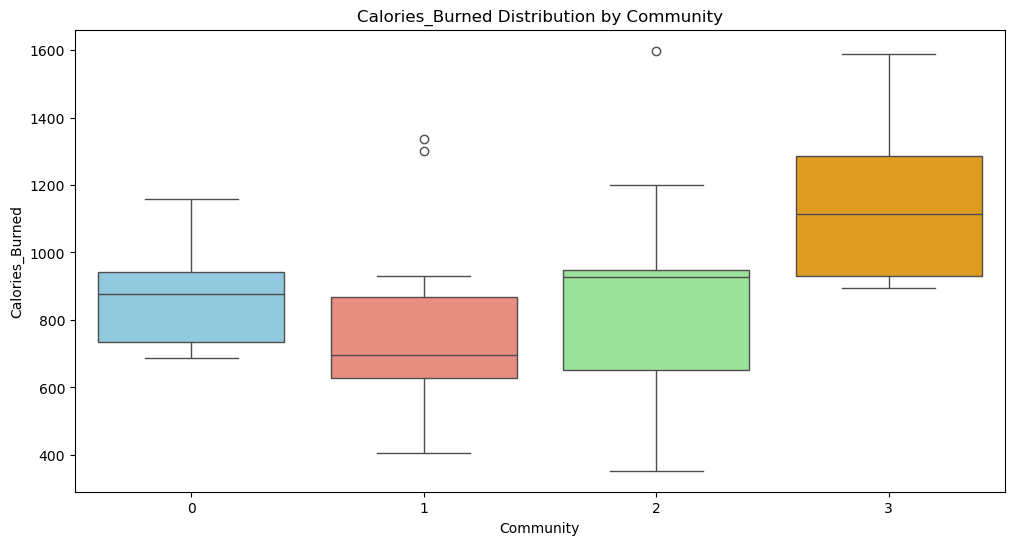

/var/folders/kt/933q6rxs34g889rrr3m3_qrw0000gn/T/ipykernel_18470/389264464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Community", y=metric, data=subset, palette=community_colors)


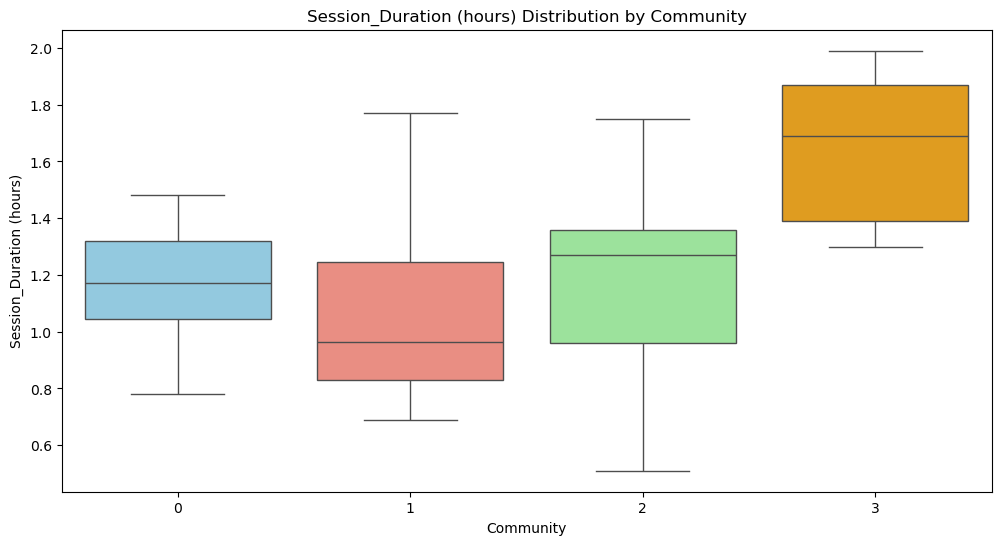

/var/folders/kt/933q6rxs34g889rrr3m3_qrw0000gn/T/ipykernel_18470/389264464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Community", y=metric, data=subset, palette=community_colors)


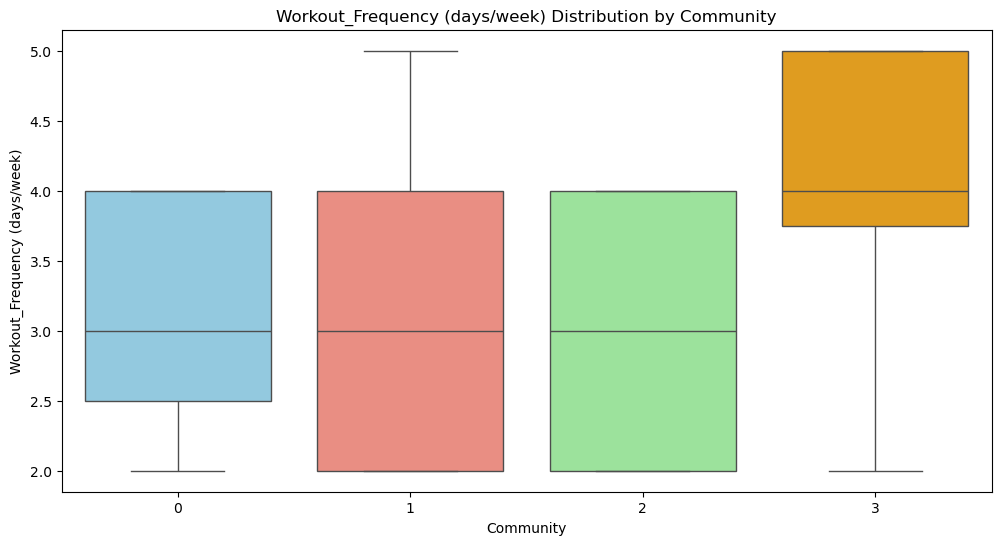

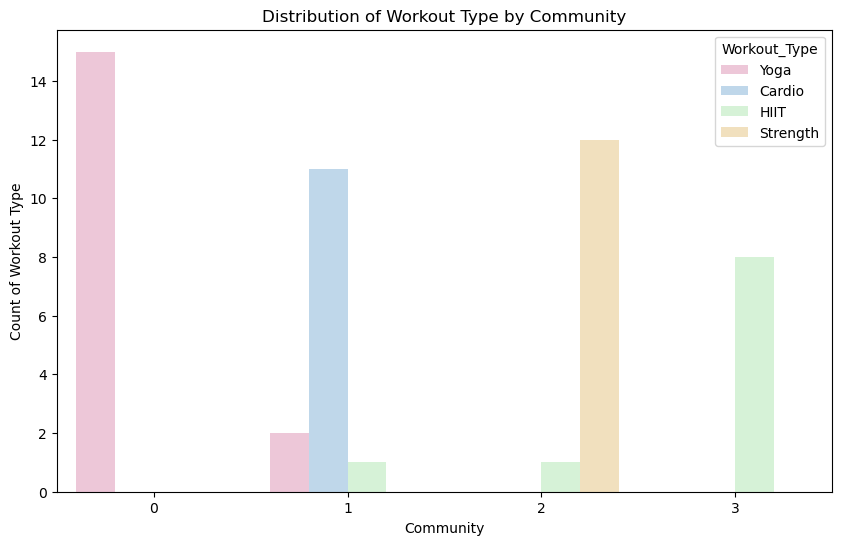

In [62]:
# Define the color palette for Community
community_colors = {
    '0': 'skyblue',     # Community 0 color
    '1': 'salmon',      # Community 1 color
    '2': 'lightgreen',  # Community 2 color
    '3': 'orange',      # Community 3 color
}

# Define a completely different color palette for Workout_Type
workout_type_colors = {
    'Cardio': '#B8D8F1',    # Soft Pastel Blue for Cardio
    'Yoga': '#F3C1D8',      # Soft Pastel Pink for Yoga
    'HIIT': '#D1F7D3',      # Soft Pastel Green for HIIT
    'Strength': '#F9E3B6'   # Soft Pastel Yellow for Strength
}


metrics = ["Calories_Burned", "Session_Duration (hours)", "Workout_Frequency (days/week)"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Community", y=metric, data=subset, palette=community_colors)
    plt.title(f'{metric} Distribution by Community')
    plt.show()

# Count plot with Workout_Type as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Community', hue='Workout_Type', data=subset, palette=workout_type_colors)
plt.title('Distribution of Workout Type by Community')
plt.xlabel('Community')
plt.ylabel('Count of Workout Type')
plt.show()



In [65]:
boxplot_stats = {}

for community in subset["Community"].unique():
    data = subset[subset["Community"] == community]["Calories_Burned"]
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    whisker_low = q1 - 1.5 * iqr
    whisker_high = q3 + 1.5 * iqr
    outliers = data[(data < whisker_low) | (data > whisker_high)]
    
    boxplot_stats[community] = {
        "Q1": q1,
        "Median": median,
        "Q3": q3,
        "Whisker_Low": whisker_low,
        "Whisker_High": whisker_high,
        "Outliers": outliers.tolist(),
    }

print(boxplot_stats)


{1: {'Q1': 629.25, 'Median': 696.5, 'Q3': 868.0, 'Whisker_Low': 271.125, 'Whisker_High': 1226.125, 'Outliers': [1336.0, 1301.0]}, 3: {'Q1': 929.75, 'Median': 1113.5, 'Q3': 1285.5, 'Whisker_Low': 396.125, 'Whisker_High': 1819.125, 'Outliers': []}, 0: {'Q1': 734.5, 'Median': 876.0, 'Q3': 943.5, 'Whisker_Low': 421.0, 'Whisker_High': 1257.0, 'Outliers': []}, 2: {'Q1': 653.0, 'Median': 927.0, 'Q3': 949.0, 'Whisker_Low': 209.0, 'Whisker_High': 1393.0, 'Outliers': [1598.0]}}


In [36]:
# Create separate datasets for each community
community_0 = subset[subset['Community'] == 0]
community_1 = subset[subset['Community'] == 1]
community_2 = subset[subset['Community'] == 2]
community_3 = subset[subset['Community'] == 3]

# Optional: Store these datasets in a dictionary for easier processing
communities = {
    0: community_0,
    1: community_1,
    2: community_2,
    3: community_3
}


In [37]:
for community_id, data in communities.items():
    avg_calories = data['Calories_Burned'].mean()
    print(f"Community {community_id}: Avg Calories Burned = {avg_calories:.2f}")


Community 0: Avg Calories Burned = 881.53
Community 1: Avg Calories Burned = 770.86
Community 2: Avg Calories Burned = 839.62
Community 3: Avg Calories Burned = 1150.38


In [40]:
# Extracting BMI data for each group
yoga_bmi_c0 = subset[(subset['Community'] == 0) & (subset['Workout_Type'] == 'Yoga')]['BMI']
cardio_bmi_c1 = subset[(subset['Community'] == 1) & (subset['Workout_Type'] == 'Cardio')]['BMI']
strength_bmi_c2 = subset[(subset['Community'] == 2) & (subset['Workout_Type'] == 'Strength')]['BMI']
hiit_bmi_c3 = subset[(subset['Community'] == 3) & (subset['Workout_Type'] == 'HIIT')]['BMI']

# Summary statistics
print("BMI Statistics for Each Group:")
print(f"Yoga in Community 0: Mean = {yoga_bmi_c0.mean():.2f}, Median = {yoga_bmi_c0.median():.2f}, Std Dev = {yoga_bmi_c0.std():.2f}")
print(f"Cardio in Community 1: Mean = {cardio_bmi_c1.mean():.2f}, Median = {cardio_bmi_c1.median():.2f}, Std Dev = {cardio_bmi_c1.std():.2f}")
print(f"Strength in Community 2: Mean = {strength_bmi_c2.mean():.2f}, Median = {strength_bmi_c2.median():.2f}, Std Dev = {strength_bmi_c2.std():.2f}")
print(f"HIIT in Community 3: Mean = {hiit_bmi_c3.mean():.2f}, Median = {hiit_bmi_c3.median():.2f}, Std Dev = {hiit_bmi_c3.std():.2f}")




BMI Statistics for Each Group:
Yoga in Community 0: Mean = 30.22, Median = 27.92, Std Dev = 8.88
Cardio in Community 1: Mean = 23.06, Median = 23.20, Std Dev = 4.33
Strength in Community 2: Mean = 23.97, Median = 25.49, Std Dev = 6.46
HIIT in Community 3: Mean = 24.55, Median = 24.21, Std Dev = 5.16


In [ ]:
# Extracting Age data for each group
yoga_age_c0 = subset[(subset['Community'] == 0) & (subset['Workout_Type'] == 'Yoga')]['Age']
cardio_age_c1 = subset[(subset['Community'] == 1) & (subset['Workout_Type'] == 'Cardio')]['Age']
strength_age_c2 = subset[(subset['Community'] == 2) & (subset['Workout_Type'] == 'Strength')]['Age']
hiit_age_c3 = subset[(subset['Community'] == 3) & (subset['Workout_Type'] == 'HIIT')]['Age']

# Calculate age ranges
print("Age Ranges for Each Group:")
print(f"Yoga in Community 0: {yoga_age_c0.min()} - {yoga_age_c0.max()} years")
print(f"Cardio in Community 1: {cardio_age_c1.min()} - {cardio_age_c1.max()} years")
print(f"Strength in Community 2: {strength_age_c2.min()} - {strength_age_c2.max()} years")
print(f"HIIT in Community 3: {hiit_age_c3.min()} - {hiit_age_c3.max()} years")



Age Ranges for Each Group:
Yoga in Community 0: 25 - 58 years
Cardio in Community 1: 23 - 57 years
Strength in Community 2: 18 - 58 years
HIIT in Community 3: 31 - 53 years


In [49]:
# Filter data for each group
yoga_gender_c0 = subset[(subset['Community'] == 0) & (subset['Workout_Type'] == 'Yoga')]['Gender']
cardio_gender_c1 = subset[(subset['Community'] == 1) & (subset['Workout_Type'] == 'Cardio')]['Gender']
strength_gender_c2 = subset[(subset['Community'] == 2) & (subset['Workout_Type'] == 'Strength')]['Gender']
hiit_gender_c3 = subset[(subset['Community'] == 3) & (subset['Workout_Type'] == 'HIIT')]['Gender']




# Calculate gender percentage split
print("Gender Percentage Split for Each Group:")
print(f"Yoga in Community 0:\n{yoga_gender_c0.value_counts(normalize=True) * 100}")
print(f"Cardio in Community 1:\n{cardio_gender_c1.value_counts(normalize=True) * 100}")
print(f"Strength in Community 2:\n{strength_gender_c2.value_counts(normalize=True) * 100}")
print(f"HIIT in Community 3:\n{hiit_gender_c3.value_counts(normalize=True) * 100}")


Gender Percentage Split for Each Group:
Yoga in Community 0:
Gender
Male      73.333333
Female    26.666667
Name: proportion, dtype: float64
Cardio in Community 1:
Gender
Female    63.636364
Male      36.363636
Name: proportion, dtype: float64
Strength in Community 2:
Gender
Male      58.333333
Female    41.666667
Name: proportion, dtype: float64
HIIT in Community 3:
Gender
Male      50.0
Female    50.0
Name: proportion, dtype: float64


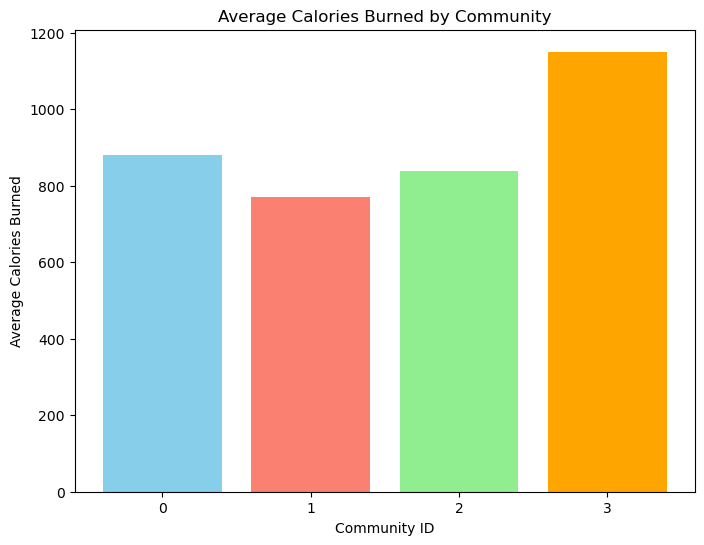

In [45]:
import matplotlib.pyplot as plt

# Data
community_ids = [0, 1, 2, 3]
avg_calories = [881.53, 770.86, 839.62, 1150.38]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(community_ids, avg_calories, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Add labels and title
plt.xlabel('Community ID')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned by Community')

# Display the plot
plt.xticks(community_ids)  # Ensure the community IDs are displayed as ticks on the x-axis
plt.show()


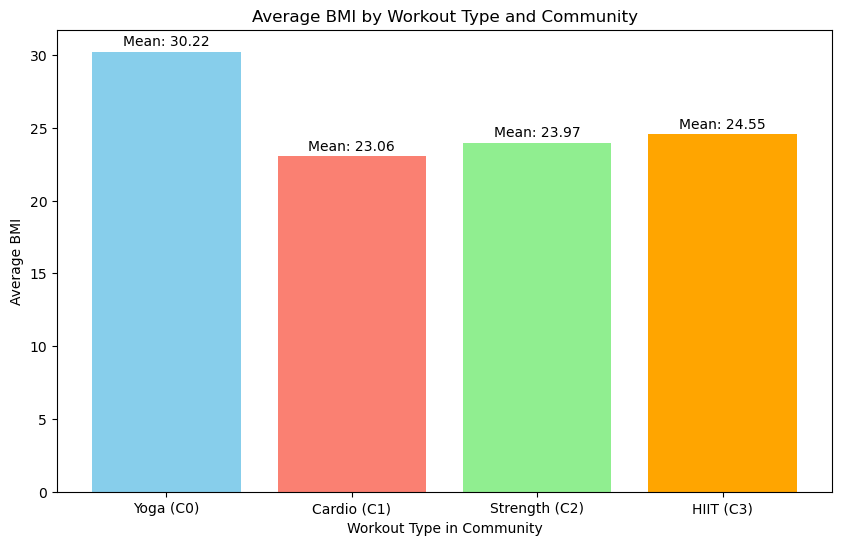

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each group
group_names = ['Yoga (C0)', 'Cardio (C1)', 'Strength (C2)', 'HIIT (C3)']
mean_bmi = [
    yoga_bmi_c0.mean(), 
    cardio_bmi_c1.mean(), 
    strength_bmi_c2.mean(), 
    hiit_bmi_c3.mean()
]

# Create a bar plot without error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(group_names, mean_bmi, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Add labels and title
plt.xlabel('Workout Type in Community')
plt.ylabel('Average BMI')
plt.title('Average BMI by Workout Type and Community')

# Display mean values on top of bars
for bar, mean in zip(bars, mean_bmi):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'Mean: {mean:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


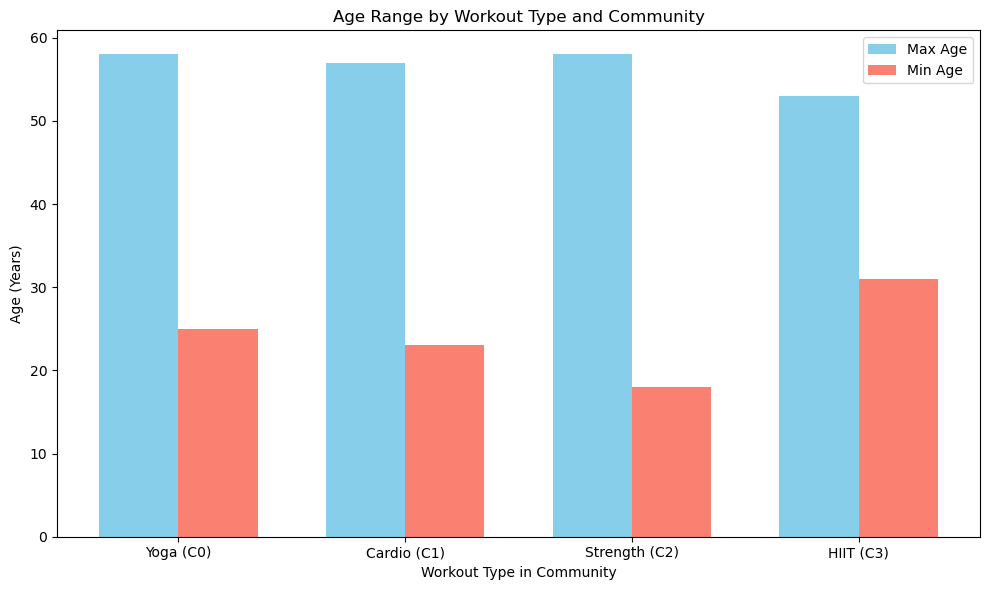

Age Ranges for Each Group:
Yoga in Community 0: 25 - 58 years
Cardio in Community 1: 23 - 57 years
Strength in Community 2: 18 - 58 years
HIIT in Community 3: 31 - 53 years


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each group's age range (min, max)
age_ranges = [
    (yoga_age_c0.min(), yoga_age_c0.max()), 
    (cardio_age_c1.min(), cardio_age_c1.max()), 
    (strength_age_c2.min(), strength_age_c2.max()), 
    (hiit_age_c3.min(), hiit_age_c3.max())
]

# Extract the minimum and maximum age for each group
group_names = ['Yoga (C0)', 'Cardio (C1)', 'Strength (C2)', 'HIIT (C3)']
min_ages = [age_range[0] for age_range in age_ranges]
max_ages = [age_range[1] for age_range in age_ranges]

# Create a bar plot for the age ranges
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the age ranges as bars
bar_width = 0.35
index = np.arange(len(group_names))

# Plot the minimum and maximum ages for each group
ax.bar(index, max_ages, bar_width, label='Max Age', color='skyblue')
ax.bar(index + bar_width, min_ages, bar_width, label='Min Age', color='salmon')

# Adding labels and title
ax.set_xlabel('Workout Type in Community')
ax.set_ylabel('Age (Years)')
ax.set_title('Age Range by Workout Type and Community')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(group_names)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the age ranges
print("Age Ranges for Each Group:")
print(f"Yoga in Community 0: {yoga_age_c0.min()} - {yoga_age_c0.max()} years")
print(f"Cardio in Community 1: {cardio_age_c1.min()} - {cardio_age_c1.max()} years")
print(f"Strength in Community 2: {strength_age_c2.min()} - {strength_age_c2.max()} years")
print(f"HIIT in Community 3: {hiit_age_c3.min()} - {hiit_age_c3.max()} years")


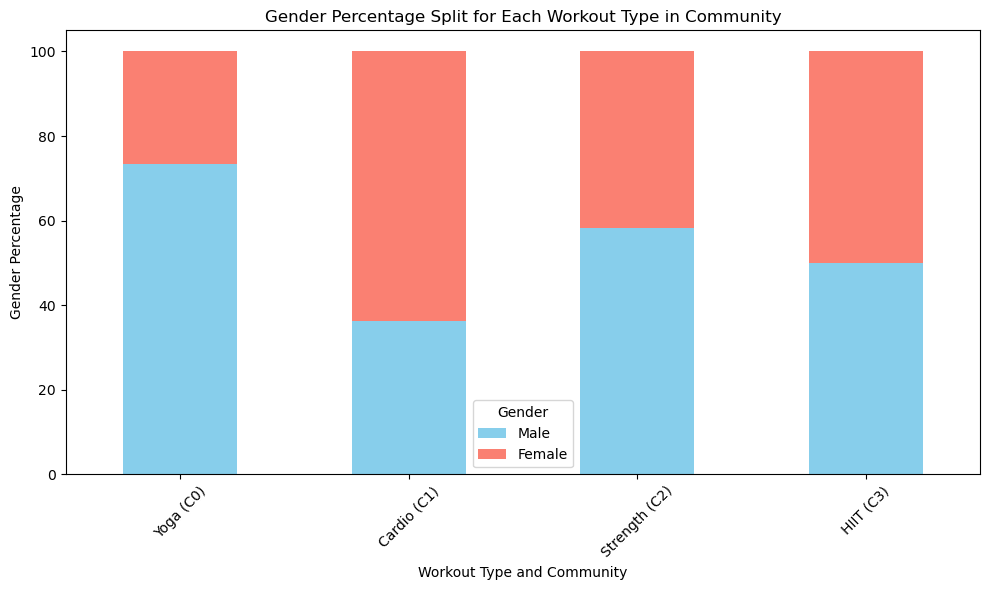

Gender Percentage Split for Each Group:
Yoga in Community 0:
Gender
Male      73.333333
Female    26.666667
Name: proportion, dtype: float64
Cardio in Community 1:
Gender
Female    63.636364
Male      36.363636
Name: proportion, dtype: float64
Strength in Community 2:
Gender
Male      58.333333
Female    41.666667
Name: proportion, dtype: float64
HIIT in Community 3:
Gender
Male      50.0
Female    50.0
Name: proportion, dtype: float64


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for gender percentage split
gender_data = {
    'Yoga (C0)': {'Male': 73.33, 'Female': 26.67},
    'Cardio (C1)': {'Male': 36.36, 'Female': 63.64},
    'Strength (C2)': {'Male': 58.33, 'Female': 41.67},
    'HIIT (C3)': {'Male': 50.00, 'Female': 50.00}
}

# Creating a DataFrame for plotting
gender_df = pd.DataFrame(gender_data).T
gender_df = gender_df.reset_index()
gender_df.columns = ['Workout_Type', 'Male', 'Female']

# Plotting the gender split as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting gender percentages
gender_df.plot(x='Workout_Type', kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])

# Adding labels and title
ax.set_xlabel('Workout Type and Community')
ax.set_ylabel('Gender Percentage')
ax.set_title('Gender Percentage Split for Each Workout Type in Community')
ax.legend(title="Gender", labels=["Male", "Female"])

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate gender percentage split and print
print("Gender Percentage Split for Each Group:")
print(f"Yoga in Community 0:\n{yoga_gender_c0.value_counts(normalize=True) * 100}")
print(f"Cardio in Community 1:\n{cardio_gender_c1.value_counts(normalize=True) * 100}")
print(f"Strength in Community 2:\n{strength_gender_c2.value_counts(normalize=True) * 100}")
print(f"HIIT in Community 3:\n{hiit_gender_c3.value_counts(normalize=True) * 100}")
